In [0]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip

--2020-04-27 06:42:41--  https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data_MNIST.zip’

data_MNIST.zip      100%[===================>] 614.89K  --.-KB/s    in 0.07s   

2020-04-27 06:42:42 (8.50 MB/s) - ‘data_MNIST.zip’ saved [629644/629644]



In [0]:
!unzip data_MNIST.zip

Archive:  data_MNIST.zip
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


In [0]:
import numpy as np
import matplotlib.pyplot as plt

train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt').astype(np.int64)

test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt').astype(np.int64)

Predicted class: 4


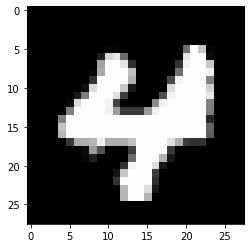

In [0]:
class KNNClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
        if metric == 'l2':
            distances = np.sum((train_images - test_image) ** 2, axis=-1)
        elif metric == 'l1':
            distances = np.sum(np.abs(train_images - test_image), axis=-1)

        sorted_indexes = np.argsort(distances)

        top_neighbors = self.train_labels[sorted_indexes[:num_neighbors]]

        class_counts = np.bincount(top_neighbors)
        
        return np.argmax(class_counts)

clf = KNNClassifier(train_images, train_labels)
print('Predicted class:', clf.classify_image(train_images[0]))

plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.show()

In [0]:
predictions = []
for test_image in test_images:
    pred_label = clf.classify_image(test_image)
    predictions.append(pred_label)

pred_labels = np.array(predictions)

np.savetxt('predictii_3nn_l2_mnist.txt', pred_labels)

correct_count = np.sum(pred_labels == test_labels)
total_count = len(test_labels)

accuracy = correct_count / total_count

print(f'Accuracy: {accuracy * 100}%')

Accuracy: 89.8%


In [0]:
ks = [1, 3, 5, 7, 9]

def compute_accuracy(metric):
    accuracies = []

    for k in ks:
        correct_count = 0
        for test_image, test_label in zip(test_images, test_labels):
            pred_label = clf.classify_image(test_image, num_neighbors=k, metric=metric)
            if pred_label == test_label:
                correct_count += 1

        accuracy = correct_count / len(test_images)
            
        accuracies.append(accuracy)

    np.savetxt(f'acuratete_{metric}.txt', np.array(accuracies))

compute_accuracy('l2')
compute_accuracy('l1')

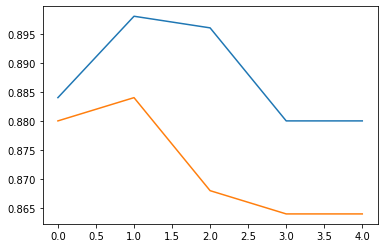

In [0]:
l2_accs = np.loadtxt('acuratete_l2.txt')
l1_accs = np.loadtxt('acuratete_l1.txt')

plt.plot(l2_accs, label='L2')
plt.plot(l1_accs, label='L1')

plt.show()